# Analysing COVID-19 Data Repository by Johns Hopkins CSSE

In this project we'll work with data from the Johns Hopkins Center for Systems Sciences and Engineering on the COVID-19 (2019-nCoV) pandemic. We'll use three datasets containg time series of number of confirmed cases, deaths and recovered people. These datasets are updated daily by the Johns Hopkins CSSE and can be found [here](https://github.com/CSSEGISandData/COVID-19).

The Johns Hopkins CSSE also mantains an [interative map](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) with the cases around the world updated almost in real time. I strongly recomend you to use this map to keep yourself updated about the global situation. As this map already provides very useful information, we'll use this project only to plot some especific charts that will enable us to see the pandemic development around the world and especially in my country, Brazil.

This notebook is still in construction and the datasets are updated on a daily basis.

We'll begin by reading the datasets into DataFrames and displaying the first five rows of each DataFrame so you can see what the data looks like.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,367,423,444,484,521,555,607,665,714,784
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,377,383,400,409,416,433,446,467,475,494
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,525,545,564,583,601,601,638,646,659,673
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,16,17,19,19,19,19,19,19,19,19


In [2]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,14,14,15,15,18,18,21,23,25
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,21,22,22,23,23,23,23,23,24,25
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,173,193,205,235,256,275,293,313,326,336
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,21,22,23,25,26,26,29,29,31,33
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [3]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,18,18,29,32,32,32,32,32,40,43
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,116,131,154,165,182,197,217,232,248,251
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,113,237,347,405,460,591,601,691,708
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,31,39,52,58,71,71,128,128,128,169
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,4,4,4,5,5


We'll now drop the latitude and longitude columns.

In [4]:
# Droping the columns on the confirmed dataframe
print('Before:')
print(confirmed.shape)
confirmed = confirmed.drop(['Lat', 'Long'], axis=1)
print('After:')
print(confirmed.shape)
print('\n')
# Droping the columns on the deaths dataframe
print('Before:')
print(deaths.shape)
deaths = deaths.drop(['Lat', 'Long'], axis=1)
print('After:')
print(deaths.shape)
print('\n')
# Droping the columns on the recovered dataframe
print('Before:')
print(recovered.shape)
recovered = recovered.drop(['Lat', 'Long'], axis=1)
print('After:')
print(recovered.shape)

Before:
(264, 89)
After:
(264, 87)


Before:
(264, 89)
After:
(264, 87)


Before:
(250, 89)
After:
(250, 87)


Now we'll set up some colors that we'll use to plot the charts.

In [5]:
blue = (31/255,119/255,180/255)
orange = (255/255, 127/255, 14/255)
green = (44/255, 160/255, 44/255)
red = (214/255, 39/255, 40/255)
yellow = (188/255, 189/255, 34/255)
pink = (227/255, 119/255, 194/255)

We'll now write a function that takes in a dataframe and drops the 'Country/Region' and 'Province/State' columns, sums all the values in the same column and returns a Series. Notice that as the columns were dropped, each column left represent a date.

`total_per_day(df, column_to_day=False)`

Parameters:
* **df: dataframe**
* **column_to_day: Bool, default False**
    * Changes the name of each column from a date to the following pattern: 'Day 1, Day 2, Day 3...'

In [6]:
def total_per_day(df, column_to_day=False):
    
    # Dropping the columns
    df = df.drop(['Country/Region', 'Province/State'], axis=1)
    df_len = df.shape[1]
    
    # Summing the columns
    total_dict = {}
    for col in df.columns:
        total_dict[col] = df[col].sum()
    
    # Transforming into Series
    total = pd.Series(total_dict)
    
    if column_to_day:
        dict_day = {}
        for i in range(1, len(total)+1):
            dict_day['Day {}'.format(i)] = total[i-1]
        
        serie_day = pd.Series(dict_day)
    else:
        return total
    
    return serie_day

Let's use the `total_per_day()` function to create Series of the total of confirmed cases, deaths and recovered in the world.

In [7]:
total_confirmed = total_per_day(confirmed)
total_deaths = total_per_day(deaths)
total_recovered = total_per_day(recovered)

And now let's plot these Series.

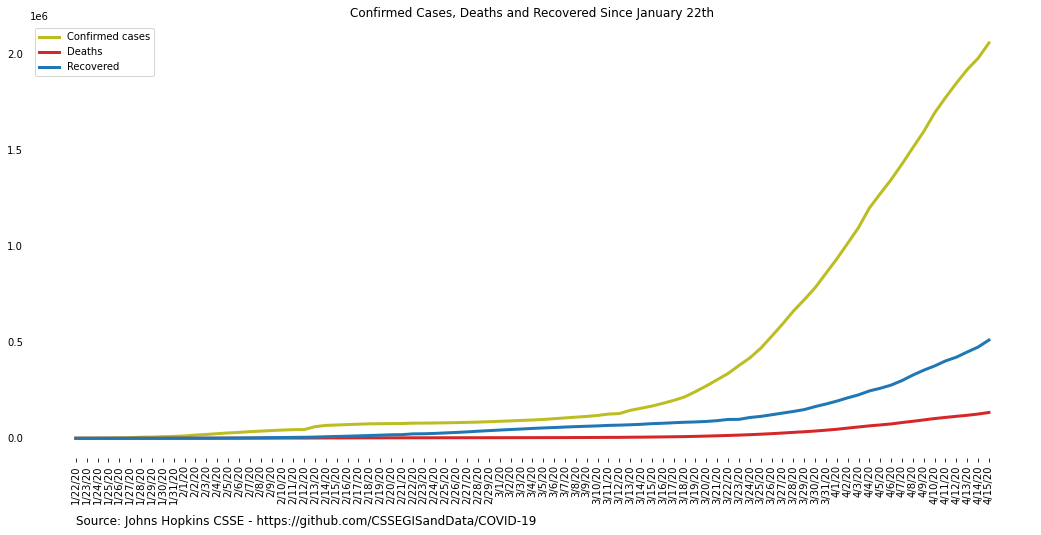

In [8]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(total_confirmed, color=yellow, label='Confirmed cases', linewidth=3)
ax.plot(total_deaths, color=red, label='Deaths', linewidth=3)
ax.plot(total_recovered, color=blue, label='Recovered', linewidth=3)

ax.set_title('Confirmed Cases, Deaths and Recovered Since January 22th')
ax.tick_params(bottom=True, top=False, left=False, right=False)
ax.text(0, -450000, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12, horizontalalignment='left' )

for key, spine in ax.spines.items():
    spine.set_visible(False)
    
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.show()

## Confirmed cases

We'll now write another function to create a series of confirmed cases for the countries we choose. But first, note that some coutries in the this dataset, however, presnet some particularities in the way their data are stored and our function we'll vahe to deal with these particularities. Let's see some examples:

The COVID-19 cases in Chine are divided by provinces in tis dataset without one row that represents the whole country, as we can see below:

In [9]:
confirmed[confirmed['Country/Region'] == 'China'][:10]

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
49,Anhui,China,1,9,15,39,60,70,106,152,...,990,990,990,991,991,991,991,991,991,991
50,Beijing,China,14,22,36,41,68,80,91,111,...,587,587,588,588,588,589,589,589,589,590
51,Chongqing,China,6,9,27,57,75,110,132,147,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,1,5,10,18,35,59,80,84,...,350,351,351,351,351,351,352,352,353,353
53,Gansu,China,0,2,2,4,7,14,19,24,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,26,32,53,78,111,151,207,277,...,1532,1533,1536,1539,1544,1548,1552,1555,1564,1566
55,Guangxi,China,2,5,23,23,36,46,51,58,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,1,3,3,4,5,7,9,9,...,146,146,146,146,146,146,146,146,146,146
57,Hainan,China,4,5,8,19,22,33,40,43,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,1,1,2,8,13,18,33,48,...,327,327,327,327,327,327,327,327,327,327


Some countries like France and United Kingdom own lots of territories around the world and all these territories in the `Province/State` column:

In [10]:
confirmed[confirmed['Country/Region'] == 'France'][:10]

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
107,French Guiana,France,0,0,0,0,0,0,0,0,...,72,72,77,83,83,83,86,86,86,86
108,French Polynesia,France,0,0,0,0,0,0,0,0,...,42,47,51,51,51,51,53,55,55,55
109,Guadeloupe,France,0,0,0,0,0,0,0,0,...,135,139,141,141,143,143,143,143,145,145
110,Mayotte,France,0,0,0,0,0,0,0,0,...,147,171,171,184,191,196,196,207,217,217
111,New Caledonia,France,0,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,Reunion,France,0,0,0,0,0,0,0,0,...,349,358,358,362,382,388,389,391,391,391
113,Saint Barthelemy,France,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,St Martin,France,0,0,0,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,35
115,Martinique,France,0,0,0,0,0,0,0,0,...,151,152,154,154,155,155,155,157,157,158
116,NaN,France,0,0,2,3,3,3,4,5,...,98010,109069,112950,117749,124869,129654,132591,136779,130253,133470


For the China situation, we'll need to sum all the columns to have the total number of cases in the country for each day. In the France situation we'll need to select as France only the row where the `Country/Region` column contains 'France' end the `Province/State` contains NaN.

`country_series(country, territories=False, divided_by_states=False, column_to_day=True )`

Parameters: 

* **country: string**
    * The country we want to extract from the DataFrame.
* **territories: bool, default False**
    * If True, only the row where the Country/Region column contains 'country' and the Province/State contains NaN will be selected.
* **divided_by_states: bool, default False**
    * If true, all the rows will be added to create a Series with the total of case for the country in each day.
* **column_to_day: bool, default True**
    * Changes the name of each column from a date to the following pattern: 'Day 1, Day 2, Day 3...'

In [11]:
def country_series(country, territories=False, divided_by_states=False, column_to_day=True ):
    
    if territories:
        country_row = confirmed[(confirmed['Country/Region'] == country) & (confirmed['Province/State'].isnull())].copy()
    else:
        country_row = confirmed[confirmed['Country/Region'] == country].copy()
     
    # Dropping the country and province columns
    country_row = country_row.drop(['Country/Region', 'Province/State'], axis=1)
    
    # Summing the columns
    if divided_by_states:
        total_dict = {}
        for col in country_row.columns:
            total_dict[col] = country_row[col].sum()
        # Converting to Series
        country_row = pd.Series(total_dict)
    
    else:
        # Squeezing the one row DataFrame to Series
        country_row = country_row.squeeze()

    # Changing the values from 0 do np.nan
    country_row = country_row.apply(lambda x : np.nan if x == 0 else x)

    # Dropping columns with null value        
    country_row = country_row.dropna()

    country_row_len = len(country_row)
        
    # Changing the column name
    if column_to_day:
        columns_by_days = []
        for i in range(1, country_row_len + 1):
            columns_by_days.append('Day {}'.format(i))
        country_row.index = columns_by_days
 
    return country_row

We'll use this function to create a Series of the total of confirmed cases for each of the following countries:

* Brazil
* Italy
* Iran
* Japan
* South Korea
* Spain
* France
* Germany
* United Kingdom
* Portugal
* Netherlands

In [12]:
# Confirmed cases
br_c = country_series('Brazil')
it_c = country_series('Italy')
ir_c = country_series('Iran')
jp_c = country_series('Japan')
sk_c = country_series('Korea, South')
sp_c = country_series('Spain')
fr_c = country_series('France', territories=True)
ge_c = country_series('Germany')
uk_c = country_series('United Kingdom', territories=True)
pt_c = country_series('Portugal')
ne_c = country_series('Netherlands', territories=True)
us_c = country_series('US')
ch_c = country_series('China', divided_by_states=True)

We'll create two lists that we'll be used to plot the charts:

* The first list contains the Series we just created;
* The second one contains the name of the countries.

In [13]:
countries_c = [it_c, us_c, sp_c, fr_c, uk_c, ge_c, jp_c, sk_c, pt_c, ne_c, ir_c, ch_c]
countries_names = ['Italy', 'USA', 'Spain', 'France', 'UK', 'Germany', 'Japan', 'South Korea', 'Portugal', 'Netherlands', 'Iran', 'China']

As we'll plot lots of charts in the same figure and each country's Series has a diffenrent lenght, we need to write a function that will determine the lenght of the x-axis for each country.

The `days()` function:

* Stores the number of days for since the first case for the country in the variable `n_days`;
* Stores the integer of the division of `n_days` by five in the variable `num_int`;
* Uses a `for` to append each number from one to `num_int` times 5 in the `int_days` list;
* Returns a list containing only the days which the day's number is divisible by 5 in the following format: 'Day 5, Day 10 , Day 15...'


In [14]:
def days(c):
    
    # Storing number of days
    n_days = len(c)
    
    # Storing the integer of the division by five
    num_int = int(n_days/5)
    
    int_days = []
    for n in range(num_int):
        num_of_the_day = 5 * (n+1)
        int_days.append(num_of_the_day)
    
    days = []
    for n in int_days:
        days.append('Day {}'.format(n))
        
    return days

Now we'll plot several charts comparing the number of confirmed cases in Brazil since its first confirmed case with the other countries within the same number of days since their first confirmed case.

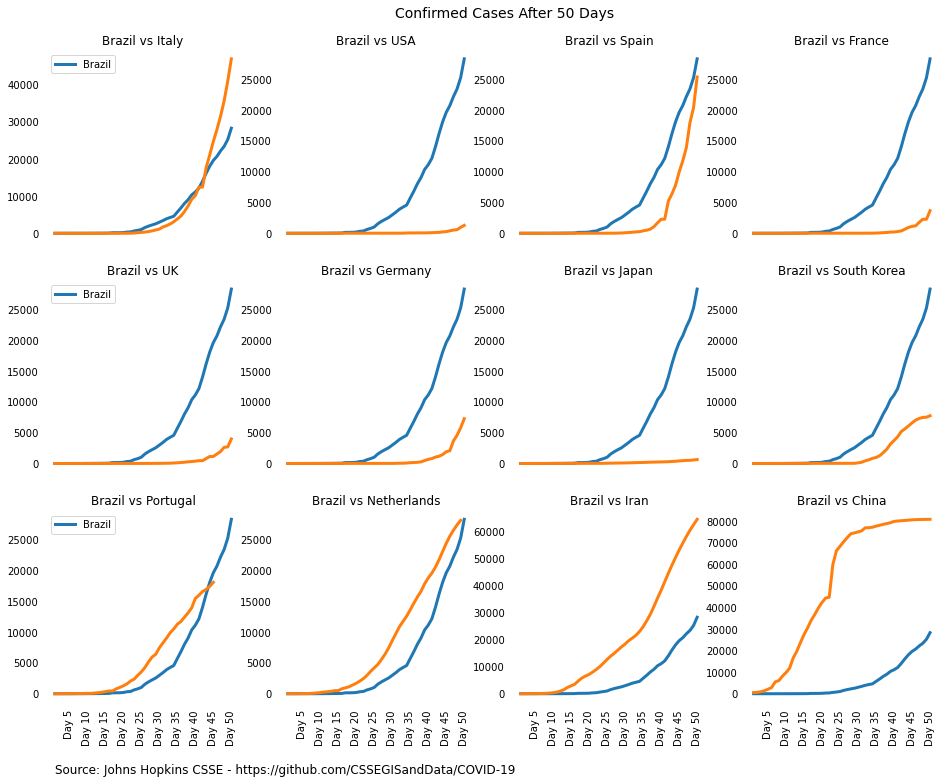

In [15]:
lenght = len(br_c)
fig = plt.figure(figsize=(16,12))

for i in range (0,12):
    ax = fig.add_subplot(3,4,i+1)
    ax.plot(br_c, color=blue, label='Brazil', linewidth=3)
    ax.plot(countries_c[i][0:lenght], color=orange, linewidth=3)
    ax.tick_params(which='both', bottom=False, top=False, left=False, right=False, labelbottom=False)
    #ax.set_xticks(days(br_c))
    ax.set_title('Brazil vs {}'.format(countries_names[i]))
    plt.xticks(days(br_c), rotation=90)
    
    if i > 7:
        ax.tick_params(labelbottom=True)
        plt.xticks(rotation=90)
        
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if i == 2:
        ax.text(-35, 35000, 'Confirmed Cases After {} Days'.format(lenght), fontsize=14, horizontalalignment='left')
    if i == 8:
        ax.text(0, -13000, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12, horizontalalignment='left' )

    if i == 0 or i == 4 or i==8:
        plt.legend(loc='upper left')
        
plt.show()


We'll now plot each country's confirmed cases within the same y-axis scales. This will allow us to compare the number of cases in each country.

We'll not plot Brazil's chart in this figure or in the next one because we've seen enough Brazil in the figure above.

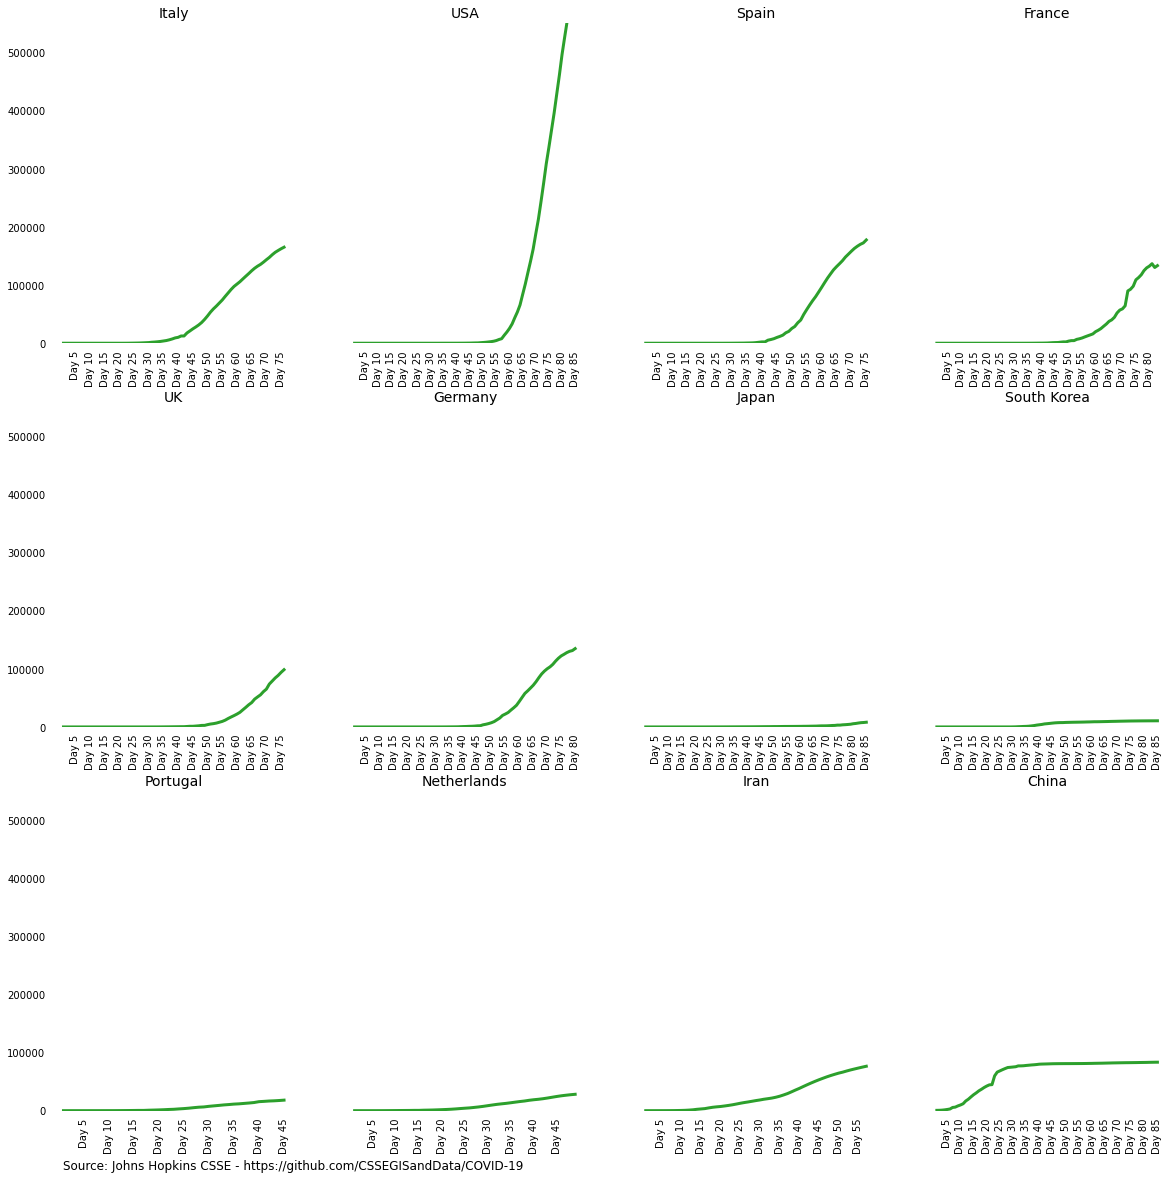

In [16]:
fig = plt.figure(figsize=(20,20))

for i in range(0,12):
    ax = fig.add_subplot(3,4, i + 1)
    ax.plot(countries_c[i], color=green, linewidth=3)
    ax.set_title(countries_names[i], fontsize=14)
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelleft=False)
    ax.set_xticks(days(countries_c[i]))
    ax.set_ylim(0, 550000)
    
    if i == 8:
        ax.text(0, -100000, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12,horizontalalignment='left' )
    
    if i == 0 or i == 4 or i == 8:
        ax.tick_params(labelleft=True)

    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    plt.xticks(rotation=90)
    
plt.show()


Now let's zoom-in in each country's chart to see the current behavior of its confirmed cases curve.

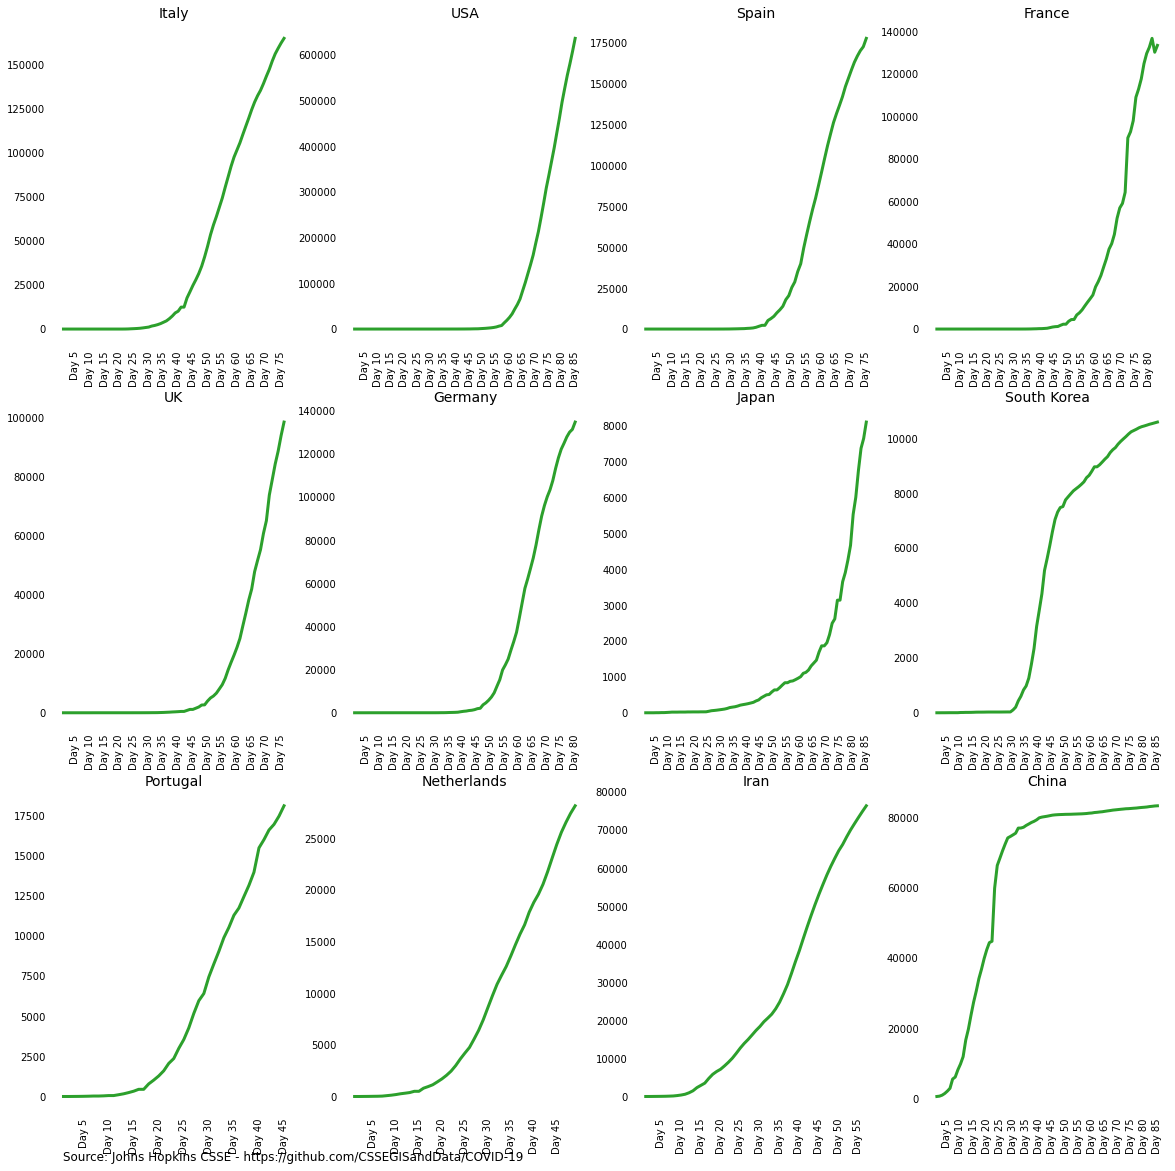

In [17]:
fig = plt.figure(figsize=(20,20))       

for i in range(0,12):
    ax = fig.add_subplot(3,4, i + 1)
    ax.plot(countries_c[i], color=green, linewidth=3)
    ax.set_title(countries_names[i], fontsize=14)
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticks(days(countries_c[i]))
    
    if i == 8:
        ax.text(0, -4000, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12,horizontalalignment='left' )
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
        
    plt.xticks(rotation=90)
    
plt.show()


## Deaths

We'll now use the `deaths_series()` function to create a series of the total of deaths for the same countries. This new function is exactly like the `country_series()` function, exceptthat it uses the `deaths` dataframe instead of the `confirmed` dataframe. 

In [18]:
def deaths_series(country, territories=False, divided_by_states=False, column_to_day=True ):
    
    if territories:
        country_row = deaths[(deaths['Country/Region'] == country) & (confirmed['Province/State'].isnull())].copy()
    else:
        country_row = deaths[deaths['Country/Region'] == country].copy()
     
    # Dropping the country and province columns
    country_row = country_row.drop(['Country/Region', 'Province/State'], axis=1)
    
    # Summing the columns
    if divided_by_states:
        total_dict = {}
        for col in country_row.columns:
            total_dict[col] = country_row[col].sum()
        # Converting to Series
        country_row = pd.Series(total_dict)
    
    else:
        # Squeezing the one row DataFrame to Series
        country_row = country_row.squeeze()

    # Changing the values from 0 do np.nan
    country_row = country_row.apply(lambda x : np.nan if x == 0 else x)

    # Dropping columns with null value        
    country_row = country_row.dropna()

    country_row_len = len(country_row)
        
    # Changing the column name
    if column_to_day:
        columns_by_days = []
        for i in range(1, country_row_len + 1):
            columns_by_days.append('Day {}'.format(i))
        country_row.index = columns_by_days
 
    return country_row

In [19]:
# Confirmed deaths
br_d = deaths_series('Brazil')
it_d = deaths_series('Italy')
ir_d = deaths_series('Iran')
jp_d = deaths_series('Japan')
sk_d = deaths_series('Korea, South')
sp_d = deaths_series('Spain')
fr_d = deaths_series('France', territories=True)
ge_d = deaths_series('Germany')
uk_d = deaths_series('United Kingdom', territories=True)
pt_d = deaths_series('Portugal')
ne_d = deaths_series('Netherlands', territories=True)
us_d = deaths_series('US')
ch_d = deaths_series('China', divided_by_states=True)

Let's add these new series to a list so we can plot the charts easier.

In [20]:
countries_d = [it_d, us_d, sp_d, fr_d, uk_d, ge_d, jp_d, sk_d, pt_d, ne_d, ir_d, ch_d]

Now we'll plot several charts comparing the number of deaths in Brazil since its first confirmed case with the other countries within the same number of days since their first confirmed case.

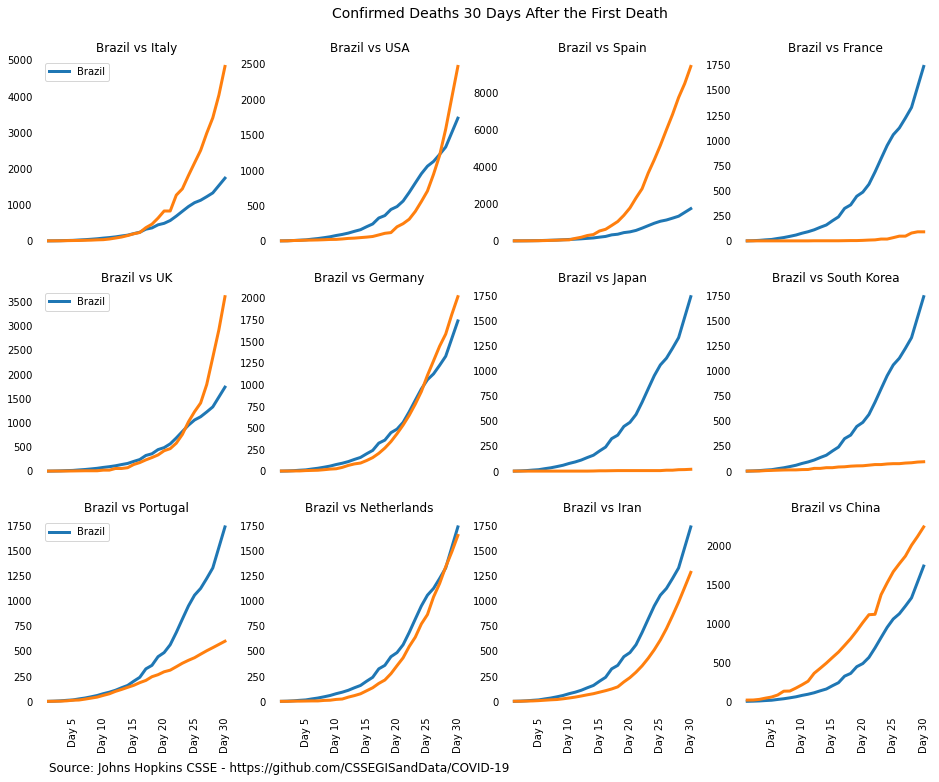

In [21]:
lenght = len(br_d)
ind = np.arange(lenght)

fig = plt.figure(figsize=(16,12))

for i in range (0,12):
    ax = fig.add_subplot(3,4,i+1)
    ax.plot(br_d, color=blue, label='Brazil', linewidth=3)
    ax.plot(countries_d[i][0:lenght], color=orange, linewidth=3)
    
    ax.tick_params(which='both', bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title('Brazil vs {}'.format(countries_names[i]))

    if i > 7:
        ax.tick_params(labelbottom=True)
        plt.xticks(days(br_d), rotation=90)
        
    if i == 2:
        ax.text(-30, 12000, 'Confirmed Deaths {} Days After the First Death'.format(lenght), fontsize=14, horizontalalignment='left')
    if i == 8:
        ax.text(0, -700, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12, horizontalalignment='left' )

    if i == 0 or i == 4 or i==8:
        plt.legend(loc='upper left')

    for key,spine in ax.spines.items():
        spine.set_visible(False)
plt.show()

We'll write a new function that will take in the death series for a country and return a series containing only the new deaths for each day.

In [22]:
def daily_new(country_death_series):
    for i in range(len(country_death_series) - 1, 0, -1):
        country_death_series[i] = (country_death_series[i] - country_death_series[i - 1])
    return country_death_series

And let's create a series containing the new deaths for each day for each of the countries.

In [23]:
br_new_d = daily_new(br_d)
it_new_d = daily_new(it_d)
ir_new_d = daily_new(ir_d)
jp_new_d = daily_new(jp_d)
sk_new_d = daily_new(sk_d)
sp_new_d = daily_new(sp_d)
fr_new_d = daily_new(fr_d)
ge_new_d = daily_new(ge_d)
uk_new_d = daily_new(uk_d)
pt_new_d = daily_new(pt_d)
ne_new_d = daily_new(ne_d)
us_new_d = daily_new(us_d)
ch_new_d = daily_new(ch_d)

We'll also add these series to a lista to make the plotting easier.

In [24]:
countries_new_d = [it_new_d, us_new_d, sp_new_d, fr_new_d, uk_new_d, ge_new_d, jp_new_d, sk_new_d, pt_new_d, ne_new_d, ir_new_d, ch_new_d]

And now we'll plot the charts comparing the number o new deaths in Brazil since its first confirmed case with other countries within the same number of days since their first confirmed case.

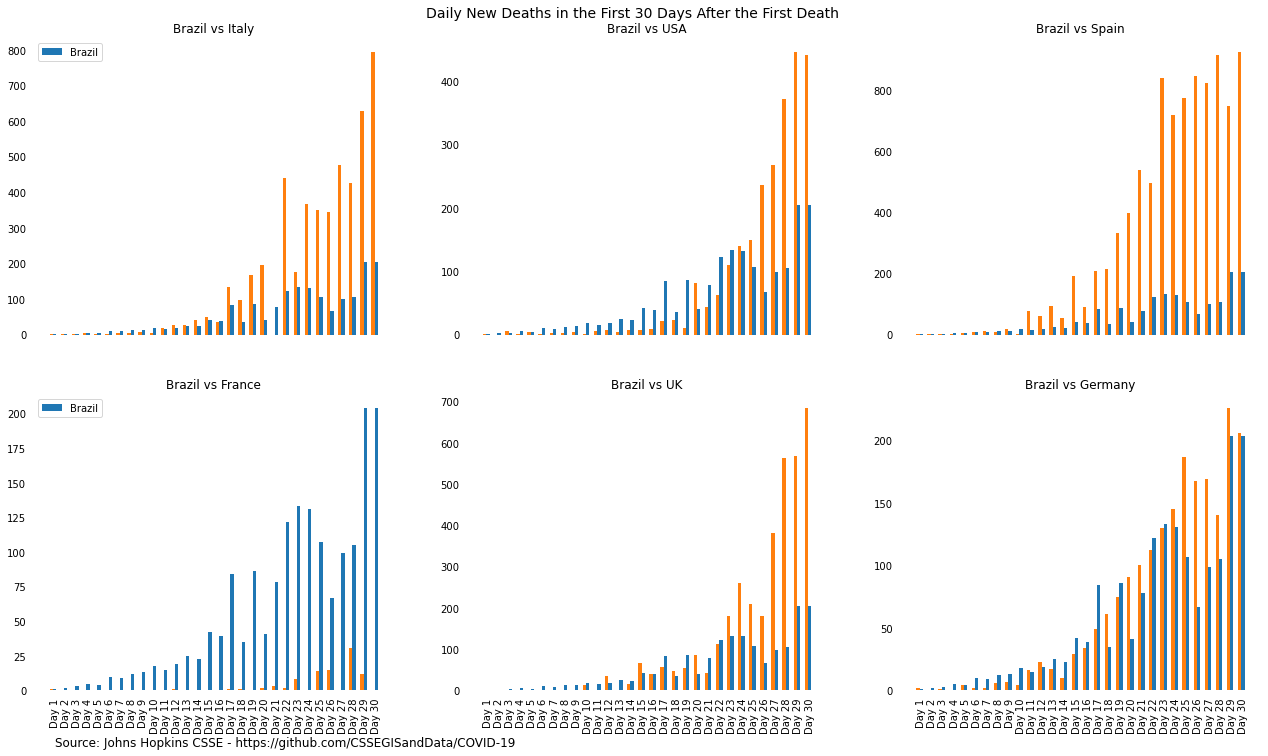

In [25]:
lenght=len(br_new_d)
coun = countries_new_d[:6]
w=0.3
fig = plt.figure(figsize=(22,12))

for i in range (0,6):
    ax = fig.add_subplot(2,3,i+1)
    
    ax.bar(x=ind, height=br_new_d[0:lenght], color=blue, width=w, label='Brazil')
    ax.bar(x=ind-w, height=coun[i][0:lenght], color=orange, width=w)

    ax.tick_params(which='both', bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_title('Brazil vs {}'.format(countries_names[i]))
    
    if i > 2:
        ax.tick_params(labelbottom=True)
        ax.set_xticks(ticks=ind)
        ax.set_xticklabels(br_new_d.index, rotation=90)
        
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    if i == 1:
        ax.text(lenght/2-2, 500, 'Daily New Deaths in the First {} Days After the First Death'.format(lenght), fontsize=14, horizontalalignment='center')
    
    if i == 3:
        ax.text(0, -40, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12, horizontalalignment='left' )

    if i == 0 or i == 3:
        plt.legend(loc='upper left')

plt.show()

We'll now create a new series containing the average new daily deaths for each of the six countries we just compared to Brazil and a series containing a three days moving average for Brazil's daily new deaths.

In [26]:
# Creating the average daily new deaths for the six countries
t = 0
for i in countries_new_d[0:5]:
    t += i
avg = t / 6

# Creating the three days moving average for Brazil
ma = br_new_d.rolling(3).mean()

And now let's plot these series with Brazil's daily new deaths Series.

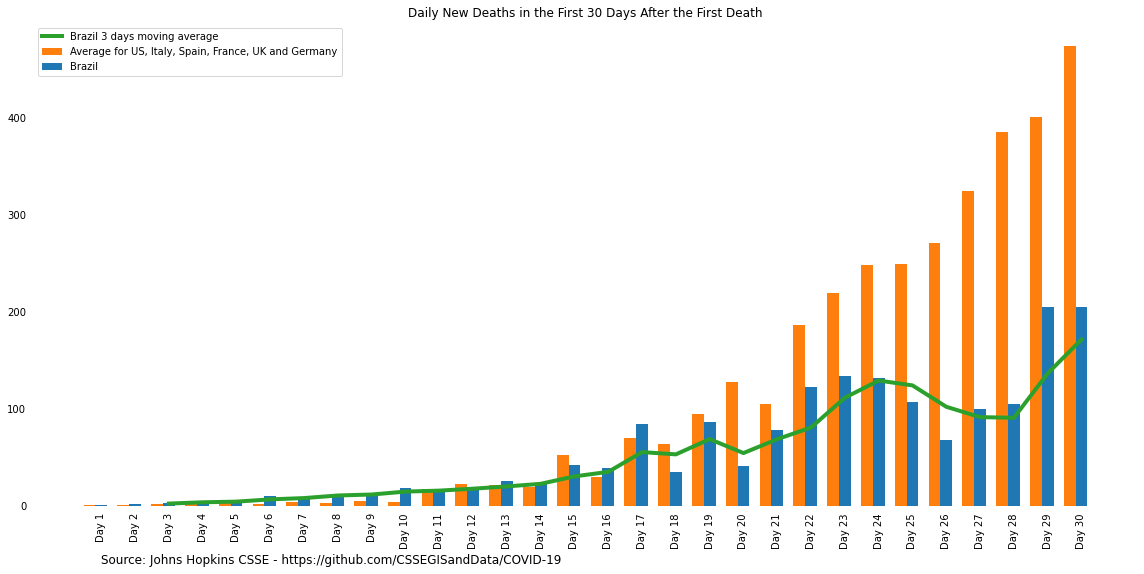

In [27]:
ind = np.arange(lenght)
w = 0.35

fig, ax = plt.subplots(figsize=(16,8))

ax.bar(x=ind-w, height=avg[:lenght], width=w, color=orange, label='Average for US, Italy, Spain, France, UK and Germany')
ax.bar(x=ind, height=br_new_d, color=blue, width=w, label='Brazil')
ax.plot(ma, color=green, linewidth=4, label='Brazil 3 days moving average')

ax.tick_params(which='both', bottom=False, top=False, left=False, right=False)
ax.set_xticks(ticks=ind)
ax.set_xticklabels(br_new_d.index, rotation=90)    
ax.set_title('Daily New Deaths in the First {} Days After the First Death'.format(lenght))
ax.text(0, -60, 'Source: Johns Hopkins CSSE - https://github.com/CSSEGISandData/COVID-19', fontsize=12, horizontalalignment='left' )

plt.legend(loc='upper left')

for key,spine in ax.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

This project is still in construction. In the next steps we'll work with the numbers of recovered and active cases.

As mentioned, the data is updated on a daily bases.